In [1]:
import pytorch_lightning as pl
from modules.lifter_2d_3d.model.graph_mlp.lit_graphmlp import LitGraphMLP as LitModel
from modules.experiments.dataset import (
    construct_synthetic_cabin_ir, synthetic_cabin_ir_dataset_root_path
)
from modules.utils.convention import get_saved_model_path
from modules.experiments.experiment import Experiment

pl.seed_everything(1234)

viewpoint = 'A_Pillar_Codriver'

constructed_loader = construct_synthetic_cabin_ir(
    dataset_root_path=synthetic_cabin_ir_dataset_root_path,
    viewpoint=viewpoint
)
saved_model_path = get_saved_model_path(
    model_name=LitModel.__name__,
    trained_dataset_name=constructed_loader['dataset_name'],
    trained_datasubset_name=constructed_loader['datasubset_name'],
)
experiment = Experiment(
    LitModel=LitModel,
    constructed_loader=constructed_loader,
    saved_model_path=saved_model_path,
    model_parameters=dict(
        exclude_ankle=True,
        exclude_knee=True
    )
)

experiment.setup(
    trainer_config=dict(max_epoch=5)
)
experiment.train()

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 37499 val_dataset 6250 test_dataset 6251
train_dataset 37499 val_dataset 6250 test_dataset 6251


Missing logger folder: saved_lifter_2d_3d_model/LitGraphMLP/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type  | Params
--------------------------------
0 | model | Model | 9.5 M 
--------------------------------
9.5 M     Trainable params
676       Non-trainable params
9.5 M     Total params
37.931    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 823.4389424324036


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 74.50386922838341
val MPJPE from: 6208 samples : 40.66505655646324


`Trainer.fit` stopped: `max_epochs=5` reached.


In [2]:
experiment.test()
experiment.print_result()

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/LitGraphMLP/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs/version_0/checkpoints/epoch=4-step=2925.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/LitGraphMLP/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs/version_0/checkpoints/epoch=4-step=2925.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     48.00805076956749     │
└───────────────────────────┴───────────────────────────┘

MPJPE = 48.00805076956749
PJPE =
                     PJPE
nose            33.340137
left_eye        35.820282
right_eye       41.382114
left_ear        36.487755
right_ear       28.973070
left_shoulder   11.927157
right_shoulder  24.730055
left_elbow      95.180443
right_elbow     92.975700
left_wrist      61.696465
right_wrist     57.331303
left_hip        55.952168
right_hip       48.307850


## Train Samples

estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])


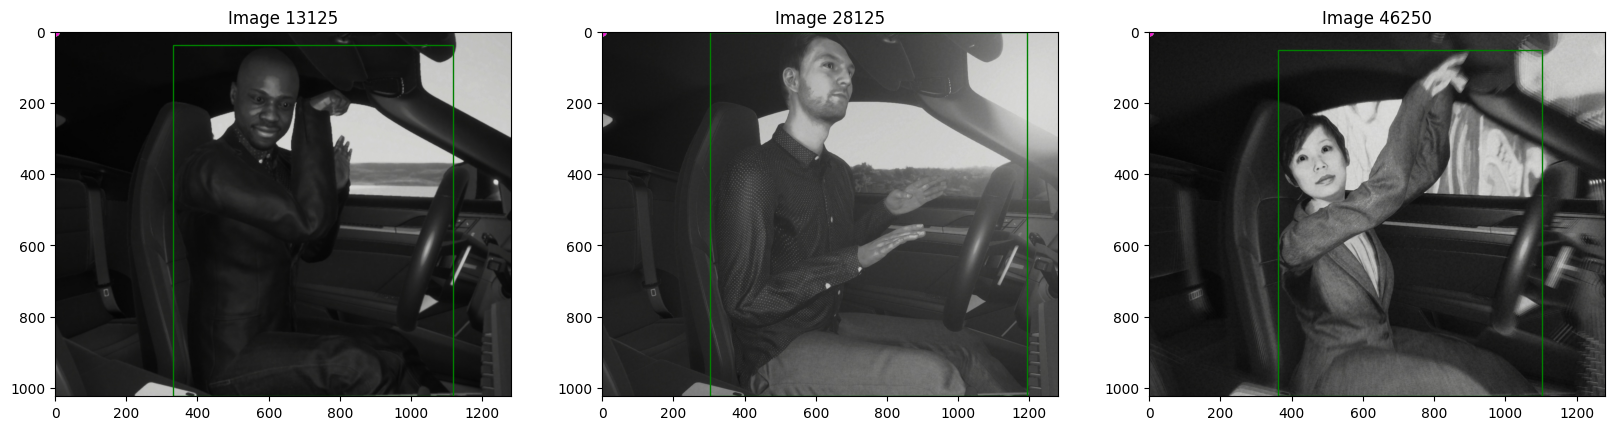

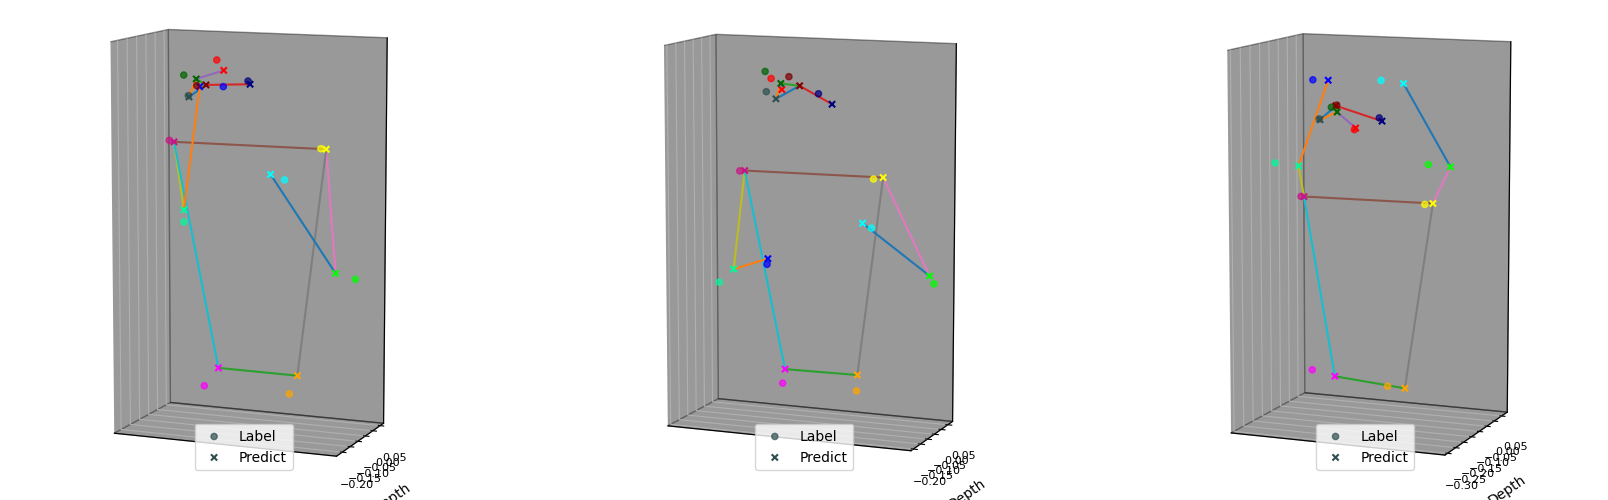

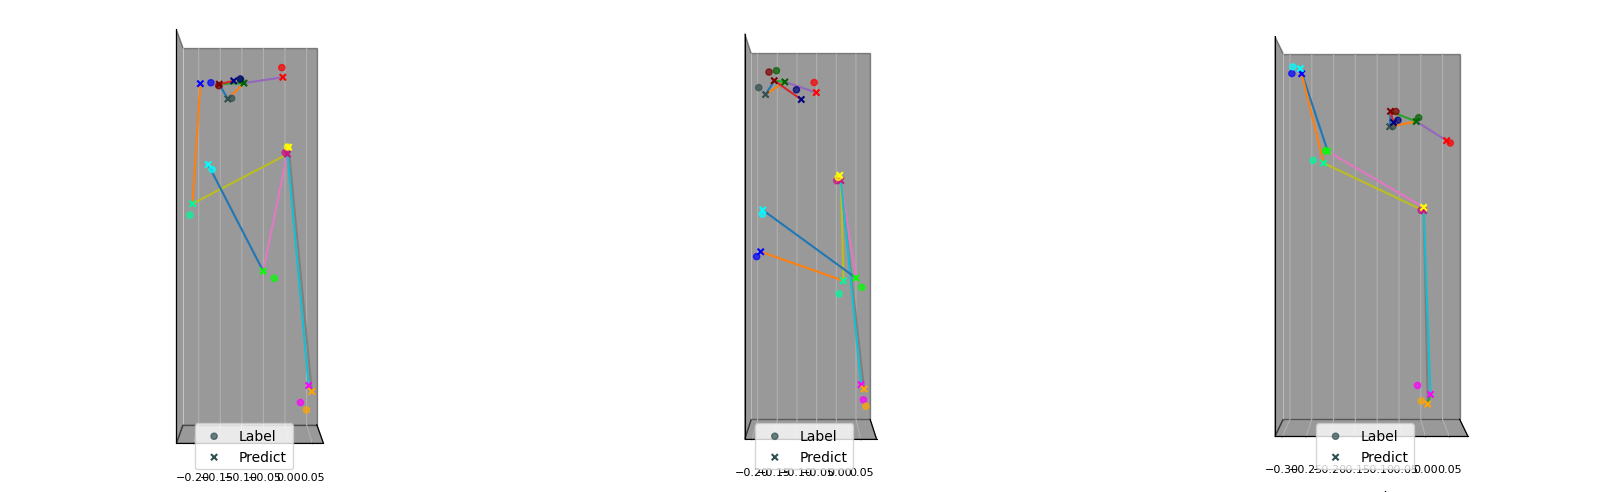

In [3]:
from modules.utils.visualization import (
    plot_samples
)
from pathlib import Path

dataset_length = len(experiment.train_loader.dataset)
plot_samples(
    Path(synthetic_cabin_ir_dataset_root_path)/ viewpoint,
    experiment.lit_model,
    experiment.train_loader,
    'train',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)

## Test Samples

estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])
estimated_pose torch.Size([1, 13, 3])


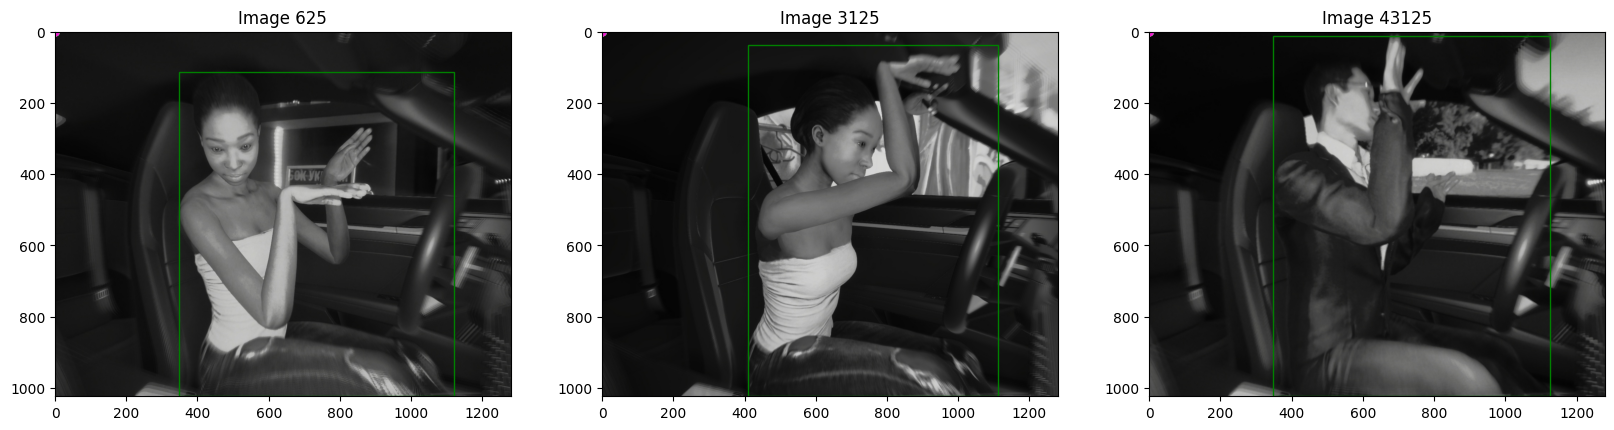

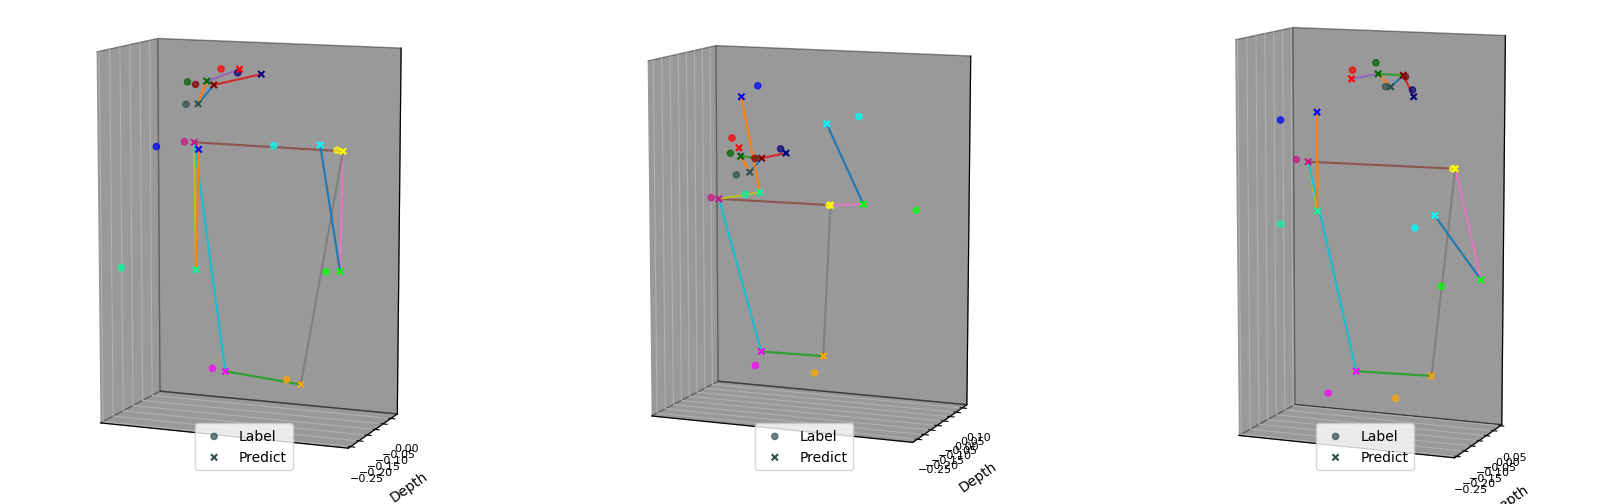

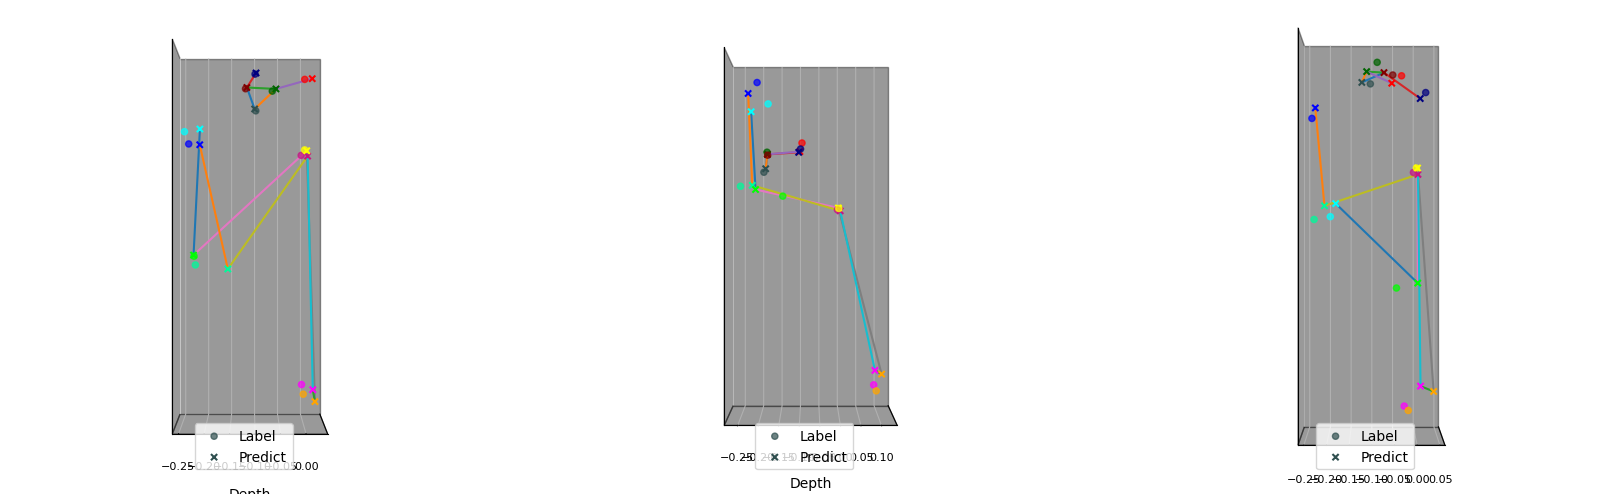

In [4]:
from modules.utils.visualization import (
    plot_samples
)
dataset_length = len(experiment.test_loader.dataset)
plot_samples(
    synthetic_cabin_ir_dataset_root_path / viewpoint,
    experiment.lit_model,
    experiment.test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)